In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load the data. Replace the path with the path to the csv file on your system
byol_svm_cat_dog_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_svm_cat_dog_accuracies.csv')
byol_svm_vehicle_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_svm_vehicles_accuracies.csv')
byol_svm_clothes_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_svm_clothes_accuracies.csv')

byol_knn_cat_dog_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_knn_cat_dog_accuracies.csv')
byol_knn_vehicle_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_knn_vehicles_accuracies.csv')
byol_knn_clothes_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_knn_clothes_accuracies.csv')

byol_rf_cat_dog_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_rf_cat_dog_accuracies.csv')
byol_rf_vehicle_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_rf_vehicles_accuracies.csv')
byol_rf_clothes_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_rf_clothes_accuracies.csv')

byol_nn_cat_dog_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_nn_cat_dog_accuracies.csv')
byol_nn_vehicle_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_nn_vehicles_accuracies.csv')
byol_nn_clothes_data = pd.read_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_nn_clothes_accuracies.csv')

In [3]:
# Add a column to each dataframe to indicate the dataset
byol_svm_cat_dog_data["Dataset"] = "Cat Dog"
byol_svm_vehicle_data["Dataset"] = "Vehicles"
byol_svm_clothes_data["Dataset"] = "Clothes"

byol_knn_cat_dog_data["Dataset"] = "Cat Dog"
byol_knn_vehicle_data["Dataset"] = "Vehicles"
byol_knn_clothes_data["Dataset"] = "Clothes"

byol_rf_cat_dog_data["Dataset"] = "Cat Dog"
byol_rf_vehicle_data["Dataset"] = "Vehicles"
byol_rf_clothes_data["Dataset"] = "Clothes"

byol_nn_cat_dog_data["Dataset"] = "Cat Dog"
byol_nn_vehicle_data["Dataset"] = "Vehicles"
byol_nn_clothes_data["Dataset"] = "Clothes"

In [4]:
# Concatenate the dataframes
byol_svm = pd.concat([byol_svm_cat_dog_data, byol_svm_vehicle_data, byol_svm_clothes_data])
byol_knn = pd.concat([byol_knn_cat_dog_data, byol_knn_vehicle_data, byol_knn_clothes_data])
byol_rf = pd.concat([byol_rf_cat_dog_data, byol_rf_vehicle_data, byol_rf_clothes_data])
byol_nn = pd.concat([byol_nn_cat_dog_data, byol_nn_vehicle_data, byol_nn_clothes_data])
byol_svm.to_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_svm_accuracies.csv', index=False)
byol_knn.to_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_knn_accuracies.csv', index=False)
byol_rf.to_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_rf_accuracies.csv', index=False)
byol_nn.to_csv('/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_nn_accuracies.csv', index=False)


In [5]:
# Add a column to each dataframe to indicate the classifier
byol_svm['classifier'] = 'Support Vector Machine'
byol_knn['classifier'] = 'K-Nearest Neighbors'
byol_rf['classifier'] = 'Random Forest'
byol_nn['classifier'] = 'Neural Network'
byol_accuracies = pd.concat([byol_svm, byol_knn, byol_rf, byol_nn], ignore_index=True)

In [6]:
# Mapping for the augmentations
mapping_augmentations = {
    'byol_model_center_cropping': 'Center Cropping',
    'byol_model_random_cropping': 'Random Cropping',
    'byol_model_color_jitter': 'Color Jitter',
    'byol_model_random_flipping': 'Random Flipping',
    'byol_model_random_perspective': 'Random Perspective',
    'byol_model_random_rotation': 'Random Rotation',
    'byol_model_random_grayscale': 'Random Grayscale',
    'byol_model_gaussian_blur': 'Gaussian Blur',
    'byol_model_random_invert': 'Random Invert',
    'byol_model_random_erasing': 'Random Erasing'
}

mapping_datasets = {
    "Cat Dog":"Cat and Dog",
    "Vehicles": "Vehicles",
    "Clothes": "Clothing"
}

columns = {
    'accuracy_train': 'Training accuracy',
    'accuracy_test': 'Testing accuracy',
    'cross_val_score': 'Cross Validation accuracies'
}
byol_accuracies['augmentation'] = byol_accuracies['augmentation'].replace(mapping_augmentations)
byol_accuracies['Dataset'] = byol_accuracies['Dataset'].replace(mapping_datasets)
byol_accuracies = byol_accuracies.rename(columns=columns)

In [7]:
byol_new_accuracies = byol_accuracies.groupby(['Dataset', 'augmentation', 'classifier'])['Testing accuracy'].apply(list).reset_index()

In [8]:
byol_new_accuracies = byol_new_accuracies.explode('Testing accuracy').reset_index(drop=True)

In [9]:
def plot_point_plot_by_classifiers(data, title):

    """Plot a point plot for the accuracies of different classifiers for different augmentations"""
    
    plt.figure(figsize=(20, 10))
    sns.set_palette("muted")
    sns.pointplot(data=data, x='augmentation', y='Testing accuracy', hue='classifier')
    plt.xlabel('Augmentation', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.ylim(0, 1.1)
    plt.xticks(fontsize=18, rotation=-60, ha='left') 
    plt.yticks(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend(title='Classifers', loc='upper right', fontsize=16)
    plt.savefig(f'{title}.pdf', bbox_inches='tight')
    plt.show()

In [10]:
def plot_point_plot_by_datasets(data, title):
    
    """Plot a point plot for the accuracies of different datasets for different augmentations"""

    plt.figure(figsize=(20, 10))
    sns.set_palette("muted")
    sns.pointplot(data=data, x='augmentation', y='Testing accuracy', hue='Dataset')
    plt.xlabel('Augmentation', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.ylim(0, 1.1)
    plt.xticks(fontsize=18, rotation=-60, ha='left') 
    plt.yticks(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend(title='Datasets', loc='upper right', fontsize=16)
    plt.savefig(f'{title}.pdf', bbox_inches='tight')
    plt.show()

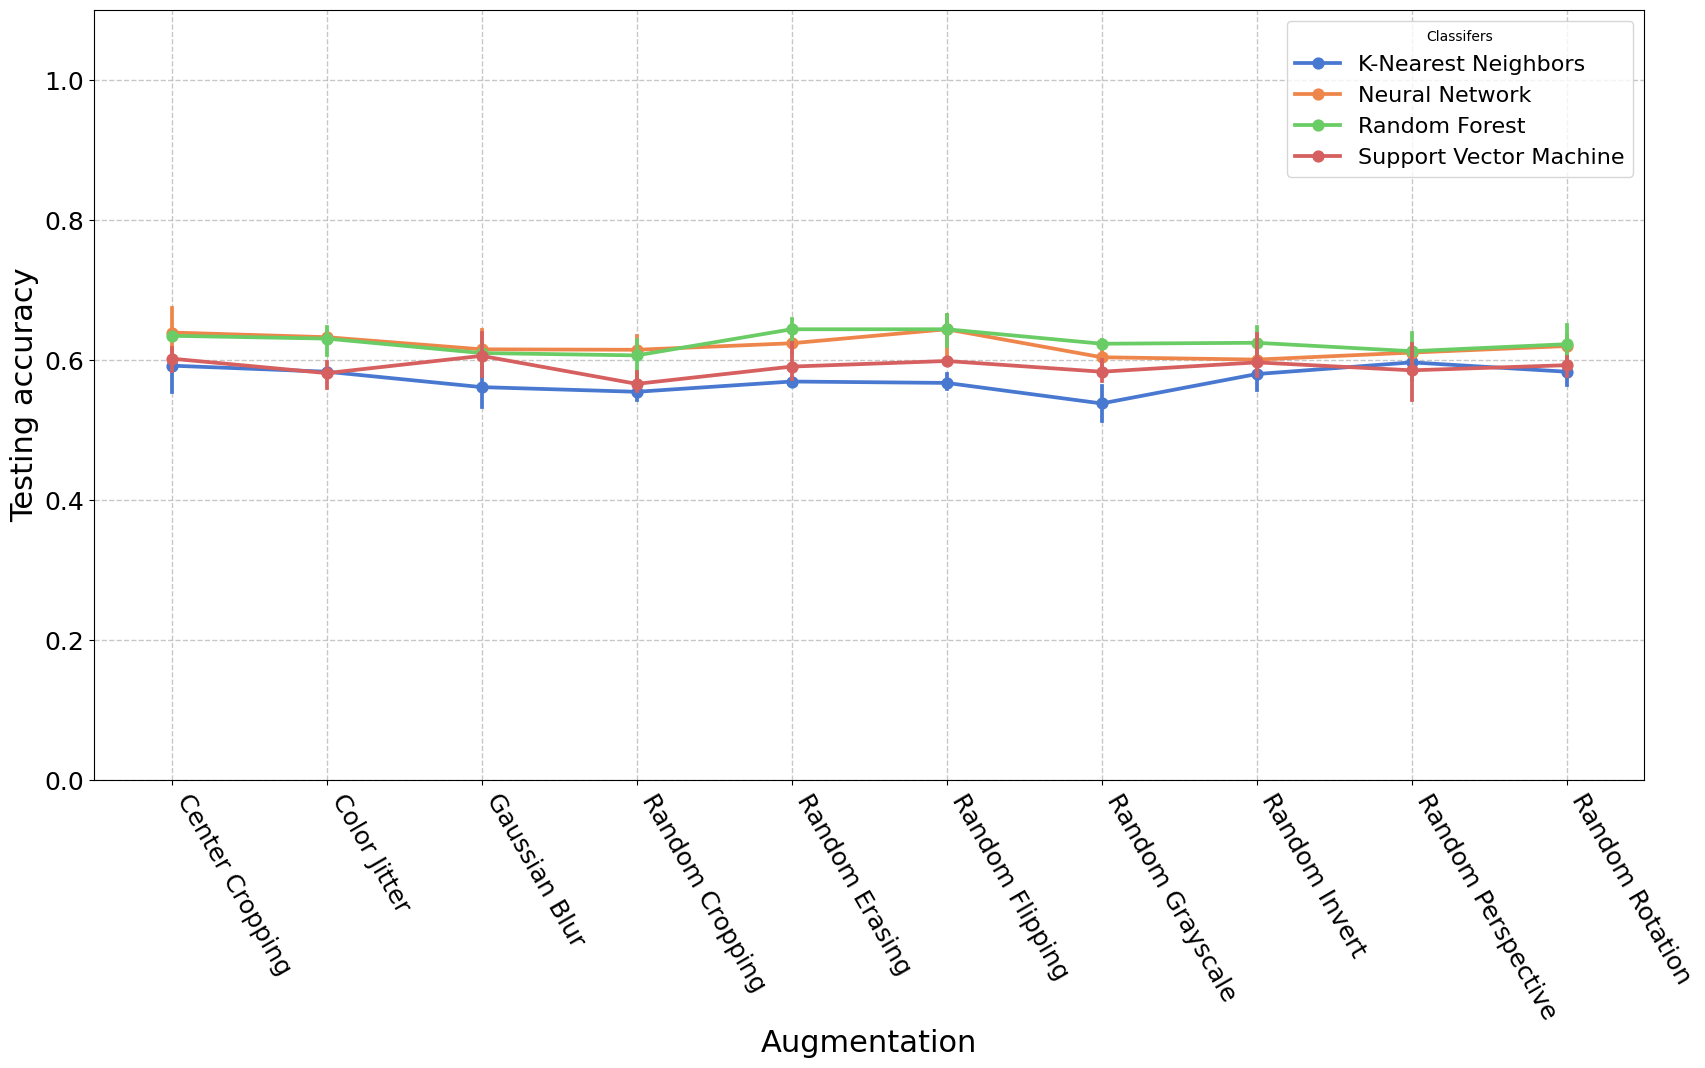

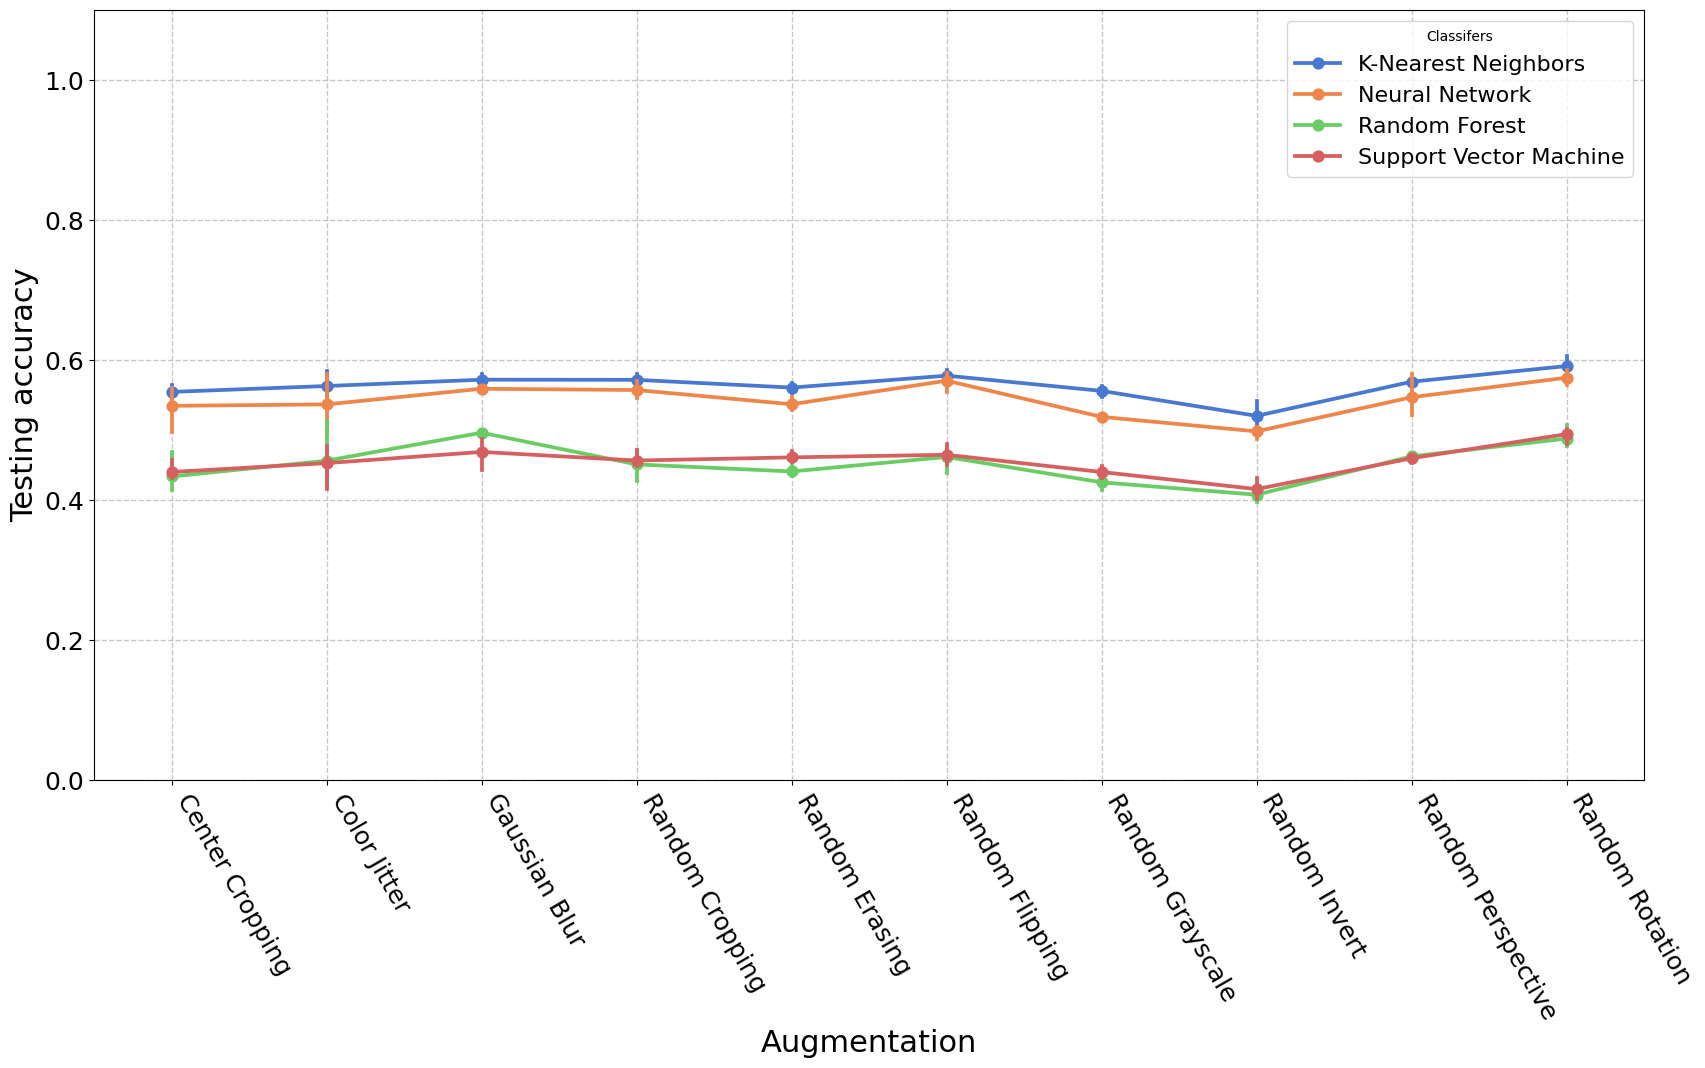

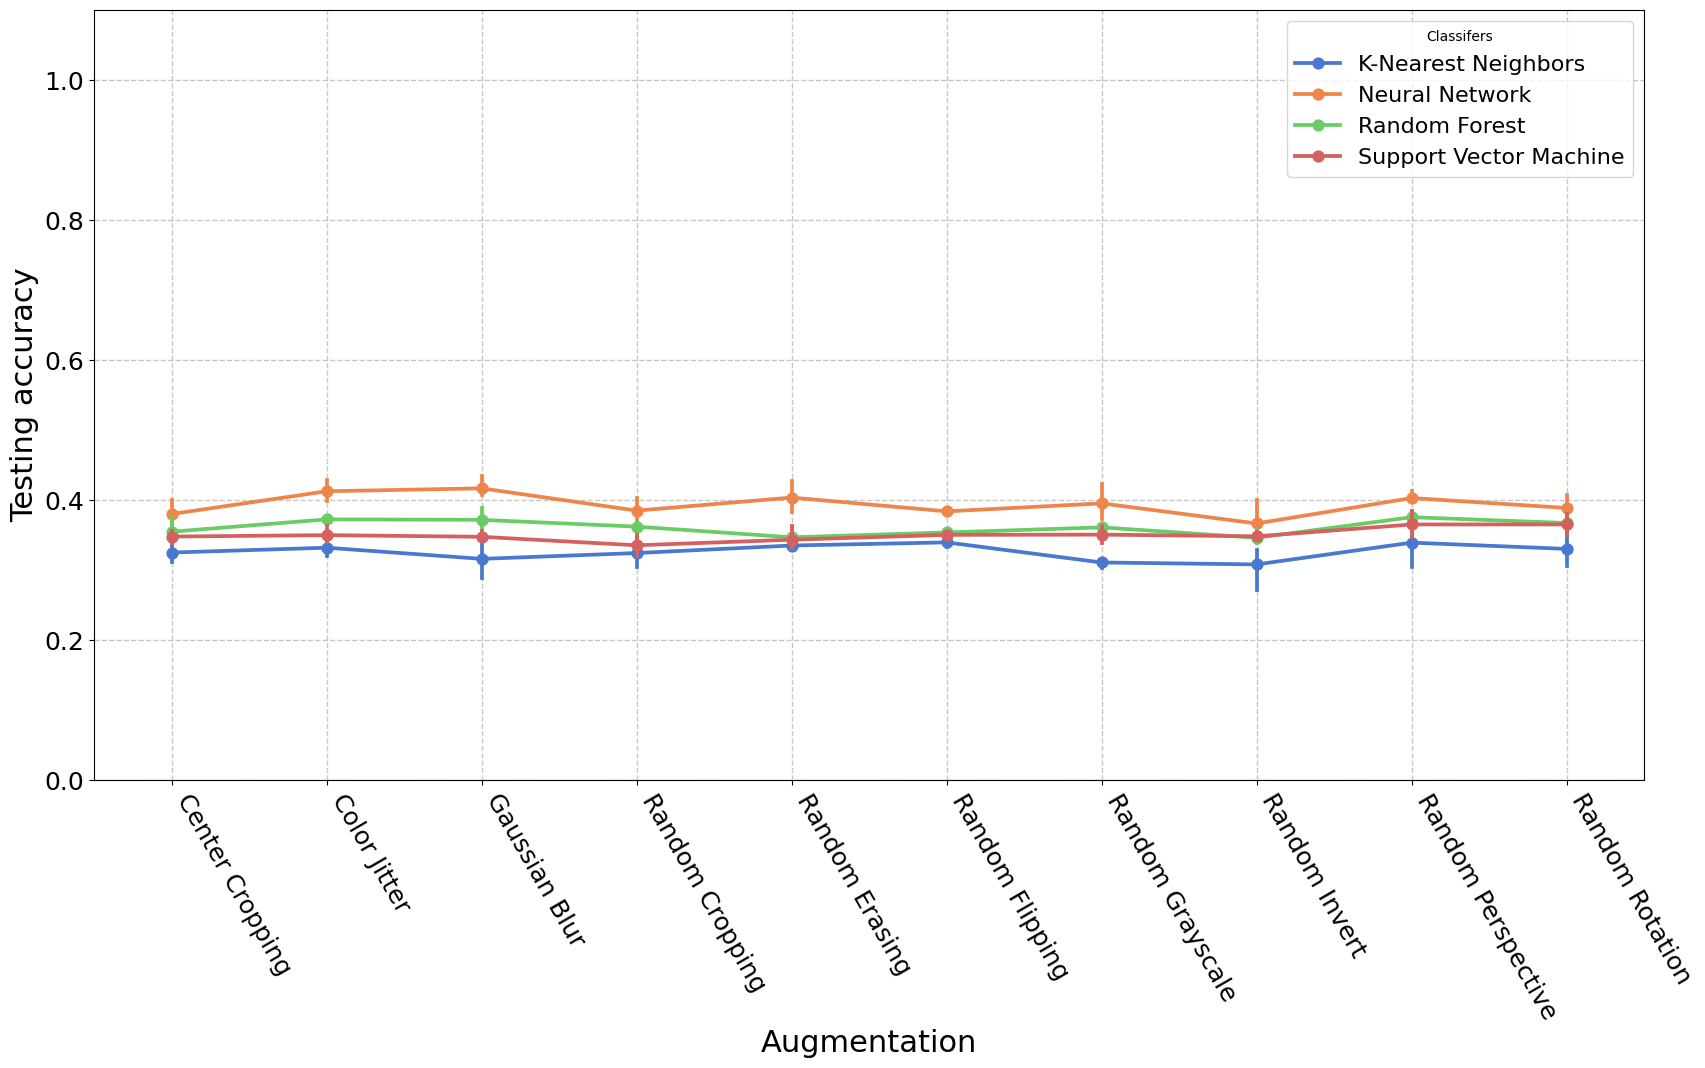

In [11]:
plot_point_plot_by_classifiers(byol_new_accuracies[byol_new_accuracies['Dataset'] == 'Cat and Dog'], 'BYOL model classification accuracies on Cat and Dog dataset')
plot_point_plot_by_classifiers(byol_new_accuracies[byol_new_accuracies['Dataset'] == 'Vehicles'], 'BYOL model classification accuracies on Vehicles dataset')
plot_point_plot_by_classifiers(byol_new_accuracies[byol_new_accuracies['Dataset'] == 'Clothing'], 'BYOL model classification accuracies on Clothing dataset')


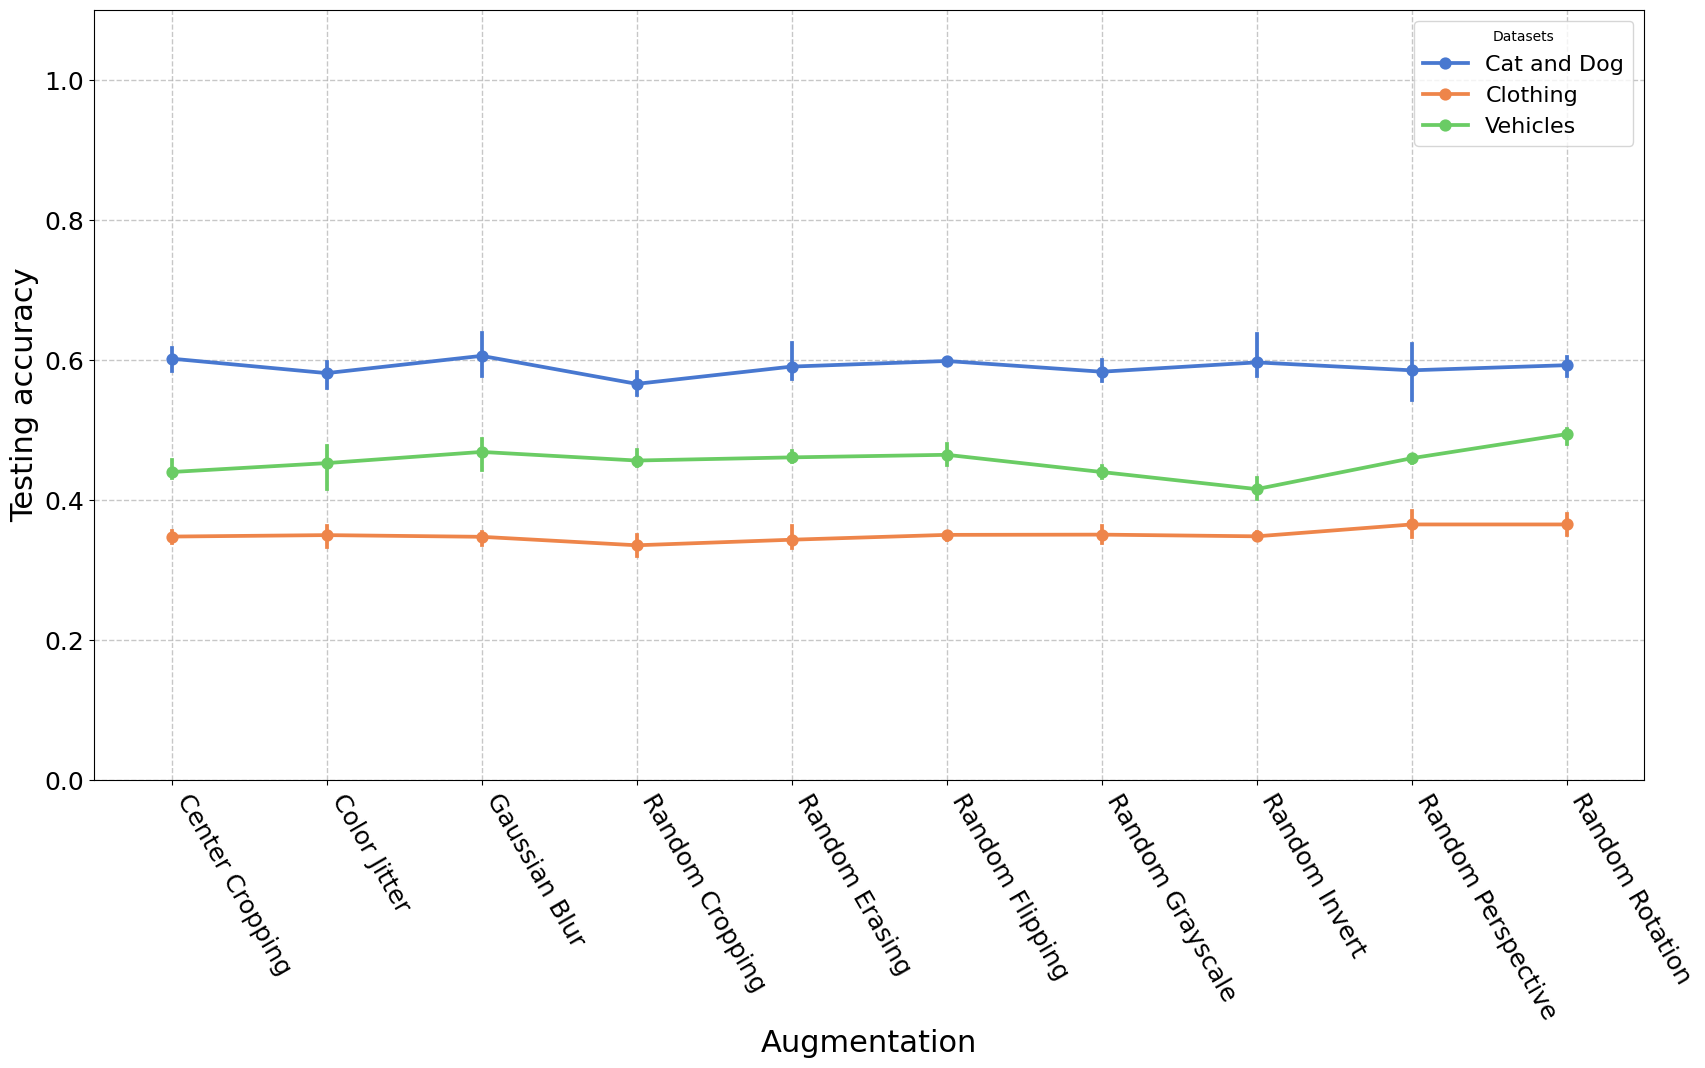

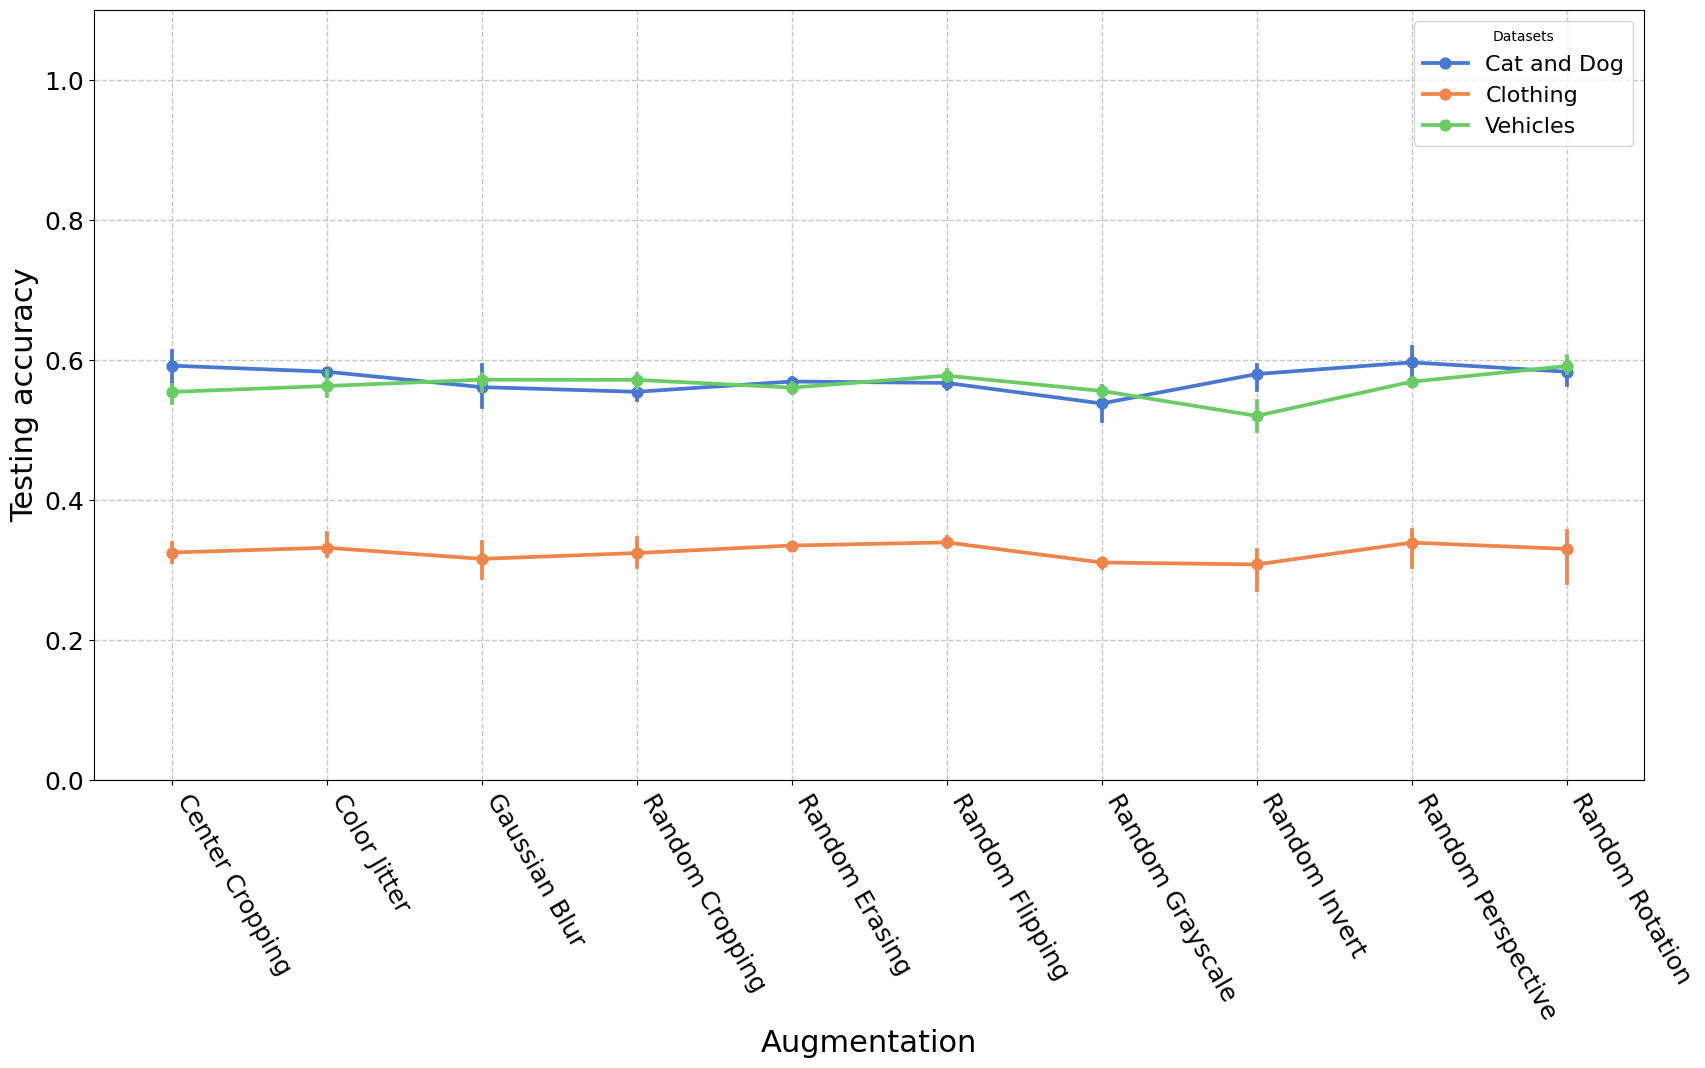

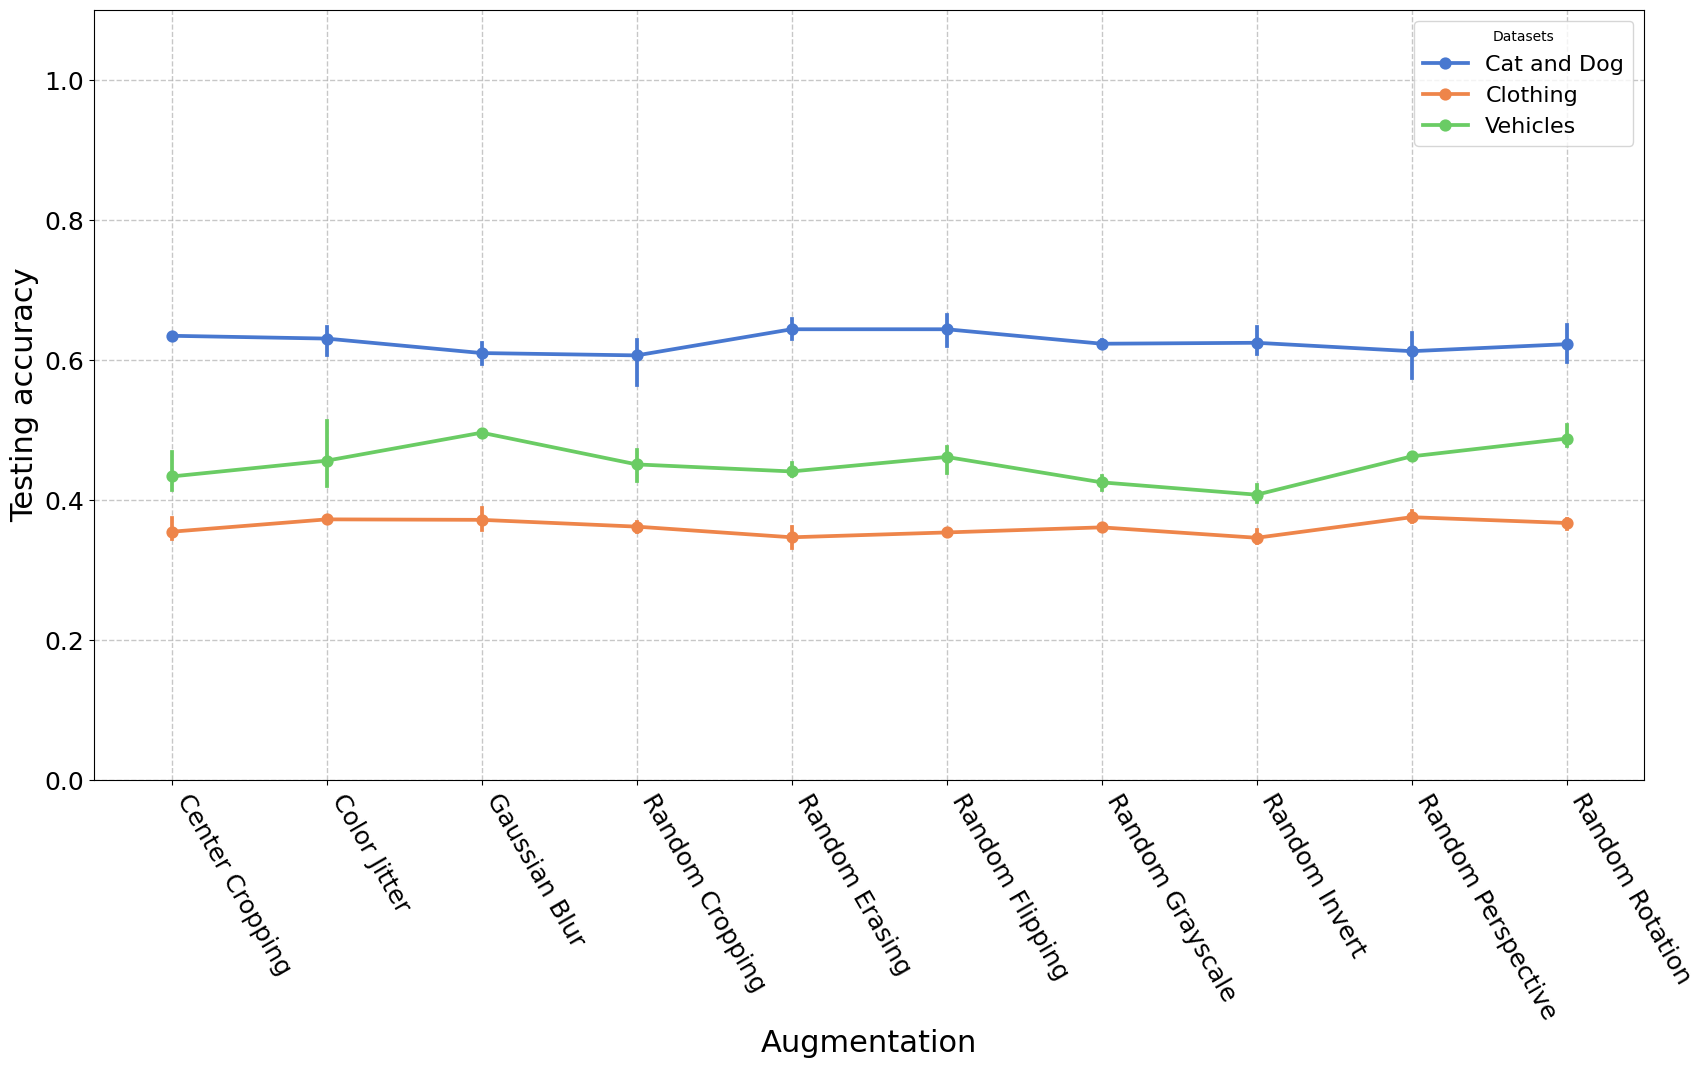

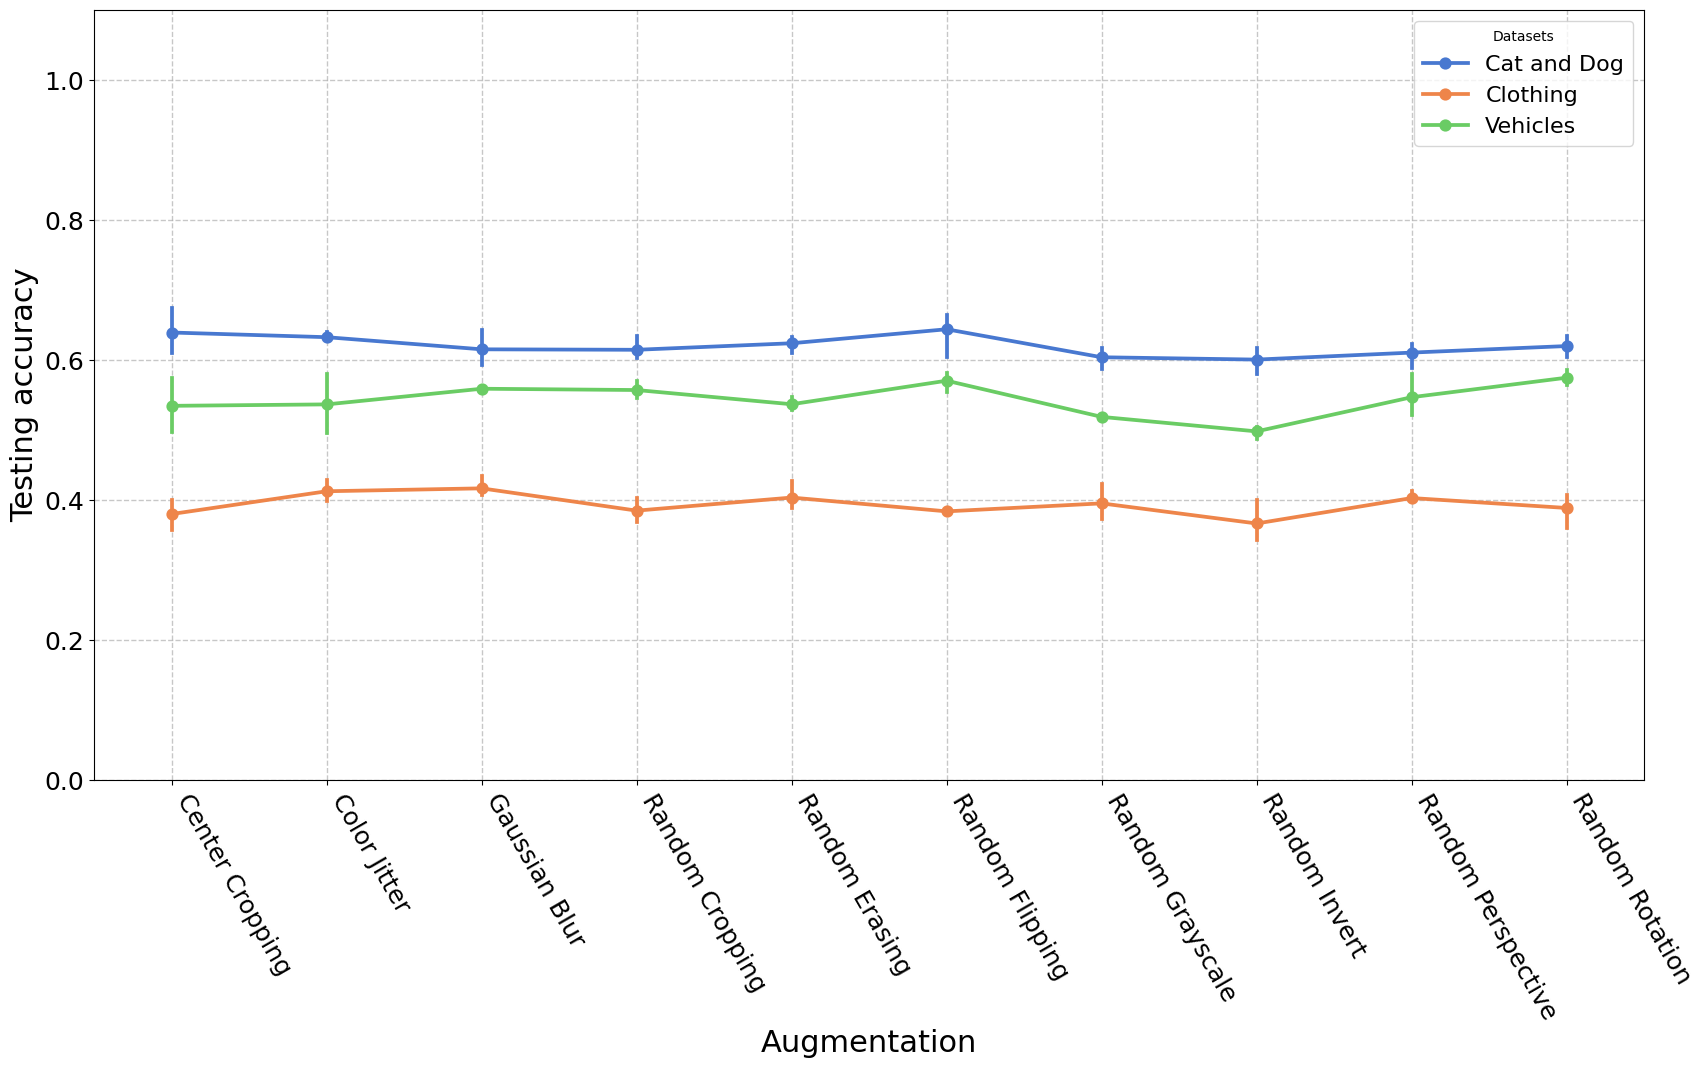

In [12]:
plot_point_plot_by_datasets(byol_new_accuracies[byol_new_accuracies['classifier'] == 'Support Vector Machine'], 'BYOL model Support Vector Machine accuracies by datasets')
plot_point_plot_by_datasets(byol_new_accuracies[byol_new_accuracies['classifier'] == 'K-Nearest Neighbors'], 'BYOL model K-Nearest Neighbors accuracies by datasets')
plot_point_plot_by_datasets(byol_new_accuracies[byol_new_accuracies['classifier'] == 'Random Forest'], 'BYOL model Random Forest accuracies by datasets')
plot_point_plot_by_datasets(byol_new_accuracies[byol_new_accuracies['classifier'] == 'Neural Network'], 'BYOL model Neural Network accuracies by datasets')